# Tompkins practice quesitons

1\.  Buoyancy and stability
Questions

i)  (3pt) Our by-now familiar air parcel of moist (but non-cloudy)
air has a temperature of 24.9 deg C. It is neutrally buoyant sitting in an
environment that has a temperature of 25 deg C and a mixing ratio of 10
$g kg^{-1}$. What is the mixing ratio in the air parcel?

In [1]:
#your code here
from a405.thermo.constants import constants as c
# c.delta = 0.608
rvenv = 1.e-2
Tenv = c.Tc + 25
Tparcel = c.Tc + 24.9
Tvenv = Tenv*(1. + c.delta*rvenv)
#Tvparcel = Tparcel*(1 + c.delta*rvparcel)
#want Tvparcel = Tvenv
rvparcel =(Tvenv/Tparcel - 1)/c.delta
print('rvparcel: {:5.3f} g/kg'.format(rvparcel*1.e3))

rvparcel: 10.555 g/kg


ii (2pt) the temperature of the air parcel is increased by 1 deg C, so
that it is no longer neutrally buoyant. Assuming the resulting
acceleration is maintained (i.e. constant) for 10 seconds, what is the
final parcel velocity?

In [2]:
#your code here
Tparcelp1 = Tparcel + 1
Tvparcel = Tparcelp1*(1 + c.delta*rvparcel)
buoy = c.g0*(Tvparcel - Tvenv)/Tvenv
print('parcel vel at 10 seconds={:5.3f} m/s'.format(buoy*10))

parcel vel at 10 seconds=0.329 m/s


iii (2 pt) Dry air at 1000 hPa is measured to have a temperature of
27oC, while at 900 hPa the temperature is 22 deg C, is this layer of the
atmosphere dry stable, neutral or unstable?

In [3]:
#your code here
temp1 = c.Tc + 27
press1 = 1.e3
p0 = 1.e3
theta1 = temp1*(p0/press1)**(c.Rd/c.cpd)
temp2 = c.Tc + 22
press2 = 9.e2
theta2 = temp2*(p0/press2)**(c.Rd/c.cpd)
print('theta1, theta2 stable',theta1,theta2)

theta1, theta2 stable 300.15 304.160334298486


2\. Fog

In this question, for simplicity, assume the definition of relative humidity 
defined in terms of mixing ratio: RH = $r_v/r_{vsat}$

i (2pt) The environmental air with temperature of 25.0 deg C and a mixing
ratio of 10 $g kg^{-1}$ is located near the surface at a pressure of
1000hPa. What is the relative humidity?

 ii (1pt) The air starts to cool isobarically at night until even-
 tually a fog forms. Assuming the pressure is 1000 hPa. What is the
 temperature at which the fogs occurs? (Use the tephigram to answer
 this, please mark the answer on the tephigram)

iii (2pt) Derive this same temperature by inverting Teton’s formula,
showing your working. (Out of interest note how close the answer is to
your tephigram result).

iv (1pt) What is the common name given to this temperature?

dewpoint is: 14.113 deg C


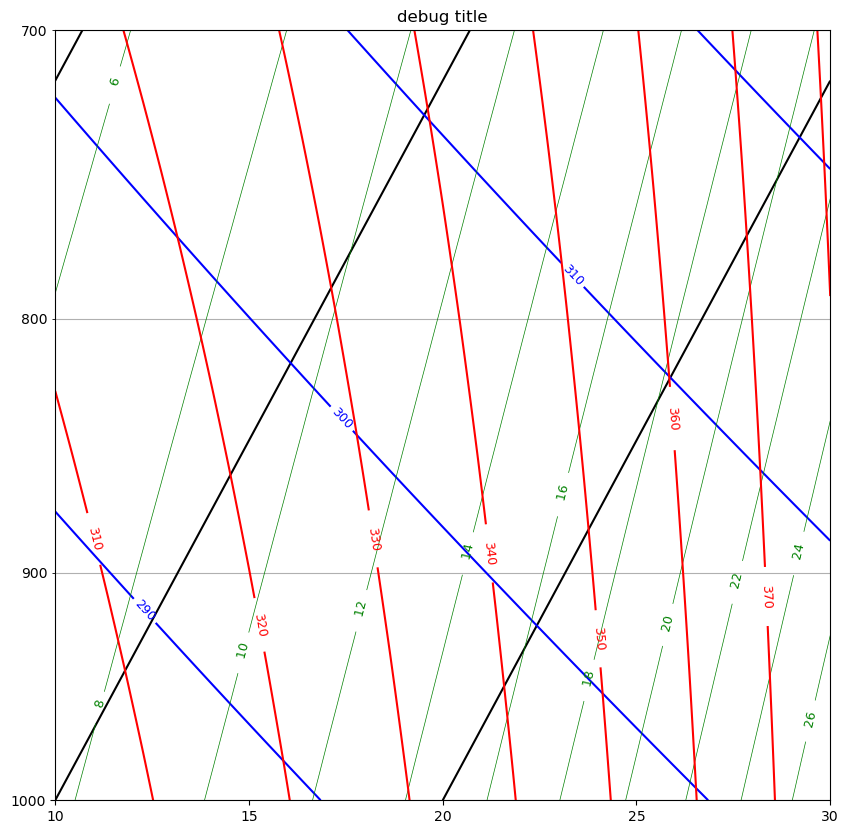

In [4]:
# your code here
from a405.skewT.fullskew import makeSkewWet, find_corners
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
corners=[10,30]
ax, skew = makeSkewWet(ax,corners=corners)
xcorners=find_corners(corners,skew=skew)
ax.set(xlim=xcorners,ylim=[1000,700])
#invert Teton
c1 = 273.16
c2=32.19
press=1.e5
rsat=1.e-2
c3=np.log(press*rsat/380.)/17.5
Tdew = (c3*c2 - c1)/(c3 - 1)
print("dewpoint is: {:5.3f} deg C".format(Tdew - c.Tc))

3\.  Relative humidity

In this question, for simplicity, assume the definition of relative
humidity defined in terms of mixing ratio.

i (2pt) A parcel of air at time t=0 has a temperature T0 of 25 deg C and a
relative humidity RH of 0.1. What is the mixing ratio $r_{v0}$?

ii (4pt) The parcel is cooled and moistened isobarically by the evaporation of precipitation to reach a final temperature 
of $T_1$ and a final mixing ratio of $r_{v1}$.  Use a rootfinder to solve for $T_1$ if the relative humidity is RH=0.6.

In [5]:
from a405.thermo.thermlib import find_rsat
from a405.thermo.constants import constants as c
press=1.e5 # Pa
rs25 = find_rsat(25 + c.Tc,press)
rv = 0.1*rs25
print(f'mixing ratio rv = {rv*1.e3:5.2f} g/kg')

mixing ratio rv =  2.03 g/kg


## use the rootfinder to find the wet bub temperature

For the root finder, guess the temperature, keeping the moist static energy constant and the air saturated.

Adapt code from the [Week 4 constant mixing ratio notebook](https://clouds.eos.ubc.ca/~phil/courses/atsc405/html/constant_mixing_ratio_solution.html)

In [6]:
from a405.thermo import rootfinder as rf

def zero_hm(temp,hm0,press):
    """
      find the temperature that matches the  energy hm0 for 
      a given rsat,press, by rootfinding this zero
      
      input: temp (guess) (K)
             hm0: moist static energy (J/kg)
             press (Pa)
      output: residual
      
     
    """
    rsat=find_rsat(temp,press)
    hmguess=c.cpd*temp + c.lv0*rsat
    residual= hm0 - hmguess
    return residual

RH0 = 0.6
press=1.e5 #Pa
T0 = 25 + c.Tc
rv0 = RH0*find_rsat(T0,press)
hm0 = c.cpd*T0 + c.lv0*rv0  #ignore height since it's not changing

brackets=rf.find_interval(zero_hm,T0,hm0,press)
wet_bulb_temp = rf.fzero(zero_hm,brackets,hm0,press)

In [7]:
print((f'the wet bulb temperature for \nRH=60% and T= = {T0 - c.Tc:5.2f} '
       f'deg C is: {wet_bulb_temp - c.Tc:5.2f} deg C'))

the wet bulb temperature for 
RH=60% and T= = 25.00 deg C is: 19.50 deg C
